Este notebook usará o conjunto de dados "Iris" (um conjunto de dados clássico e muito utilizado em aprendizado de máquina para tarefas de classificação) para prever se uma flor é da espécie Iris-Setosa ou não, usando características como o comprimento e a largura das sépalas e pétalas.

### Passos do Notebook:

1.  **Importação das bibliotecas necessárias**
2.  **Carregamento dos dados**
3.  **Pré-processamento dos dados**
4.  **Divisão dos dados em treino e teste**
5.  **Treinamento do modelo de Regressão Logística**
6.  **Previsão com o modelo treinado**
7.  **Avaliação do modelo usando várias métricas**

In [1]:
# Passo 1: Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [13]:

# Passo 2: Carregamento dos dados
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
df['target']=(data.target==0)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,True
1,4.9,3.0,1.4,0.2,True
2,4.7,3.2,1.3,0.2,True
3,4.6,3.1,1.5,0.2,True
4,5.0,3.6,1.4,0.2,True
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False
146,6.3,2.5,5.0,1.9,False
147,6.5,3.0,5.2,2.0,False
148,6.2,3.4,5.4,2.3,False


In [22]:
df['target'] = df['target'].apply(lambda x: int(x))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [23]:
# Passo 3: Pré-processamento dos dados
# Normalmente incluiria a normalização dos dados, mas será omitido aqui para simplificação

# Passo 4: Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)


In [24]:

# Passo 5: Treinamento do modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [5]:

# Passo 6: Previsão com o modelo treinado
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para calcular ROC AUC


In [6]:

# Passo 7: Avaliação do modelo usando várias métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)



In [7]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")



Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00


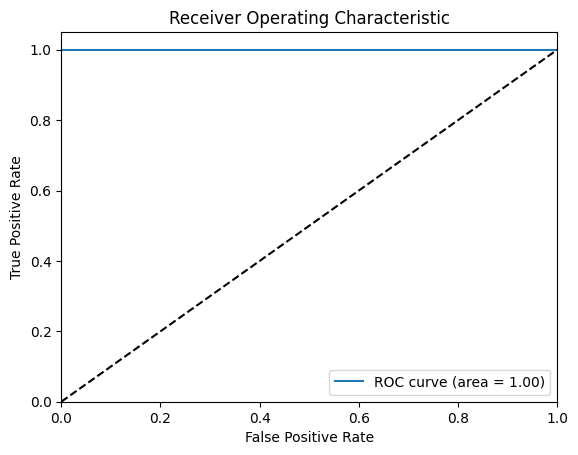

In [8]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
